<a href="https://colab.research.google.com/github/Priyanka-Kadam427/Neural-Network-Implementation/blob/main/MDM_DL_Asg1_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression using Sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the California Housing Dataset
california = datasets.fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (median house value)

# Convert the regression problem into a binary classification problem
# For example, classify whether the median house value is above or below the median
median_value = np.median(y)
y_binary = (y > median_value).astype(int)  # Binary classification (1 if above median, 0 otherwise)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and prediction
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluation
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
report_sklearn = classification_report(y_test, y_pred_sklearn)

print("Sklearn Model Results on California Housing Dataset:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print("Confusion Matrix:")
print(conf_matrix_sklearn)
print("Classification Report:")
print(report_sklearn)

Sklearn Model Results on California Housing Dataset:
Accuracy: 0.83
Confusion Matrix:
[[1719  358]
 [ 360 1691]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.82      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



## Logistic Regression using Keras

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Keras Model Results on California Housing Dataset:
Accuracy: 0.83
Confusion Matrix:
[[1721  356]
 [ 353 1698]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.83      0.83      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



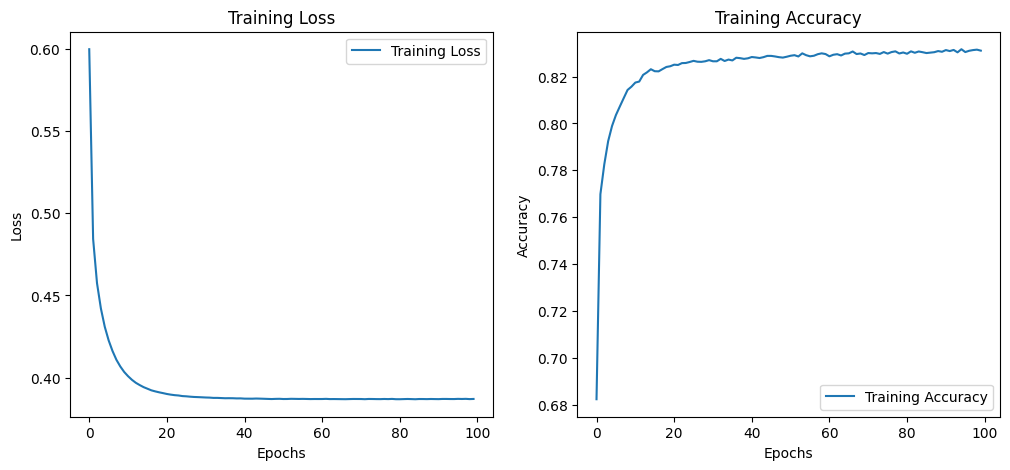

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the California Housing Dataset
california = datasets.fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (median house value)

# Convert the regression problem into a binary classification problem
# Classify whether the median house value is above or below the median
median_value = np.median(y)
y_binary = (y > median_value).astype(int)  # Binary classification (1 if above median, 0 otherwise)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras Model
keras_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))  # Single output neuron for binary classification
])
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = keras_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Make predictions
y_pred_keras = (keras_model.predict(X_test) > 0.5).astype(int)

# Evaluation
accuracy_keras = accuracy_score(y_test, y_pred_keras)
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)
report_keras = classification_report(y_test, y_pred_keras)

print("Keras Model Results on California Housing Dataset:")
print(f"Accuracy: {accuracy_keras:.2f}")
print("Confusion Matrix:")
print(conf_matrix_keras)
print("Classification Report:")
print(report_keras)

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Logistic Regression from Scratch

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    for _ in range(epochs):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
    return weights

# Predict function
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

# Load the California Housing Dataset
california = datasets.fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (median house value)

# Convert the regression problem into a binary classification problem
# Classify whether the median house value is above or below the median
median_value = np.median(y)
y_binary = (y > median_value).astype(int).reshape(-1, 1)  # Binary classification (1 if above median, 0 otherwise)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term (bias)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights
weights = np.zeros((X_train.shape[1], 1))

# Train the model
weights = gradient_descent(X_train, y_train, weights, learning_rate=0.1, epochs=1000)

# Prediction
y_pred = predict(X_test, weights)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression (Scratch) Model Results on California Housing Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Logistic Regression (Scratch) Model Results on California Housing Dataset:
Accuracy: 0.81
Confusion Matrix:
[[1705  372]
 [ 410 1641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2077
           1       0.82      0.80      0.81      2051

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128



# **Activation Functions**

## Sigmoid

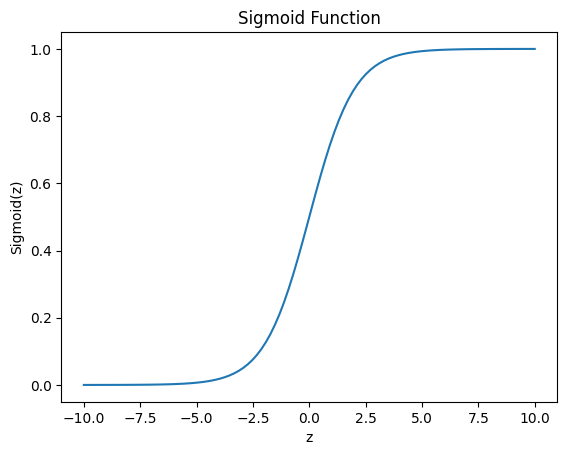

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of values for z
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.plot(z, sigmoid_values)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.show()

## Tanh

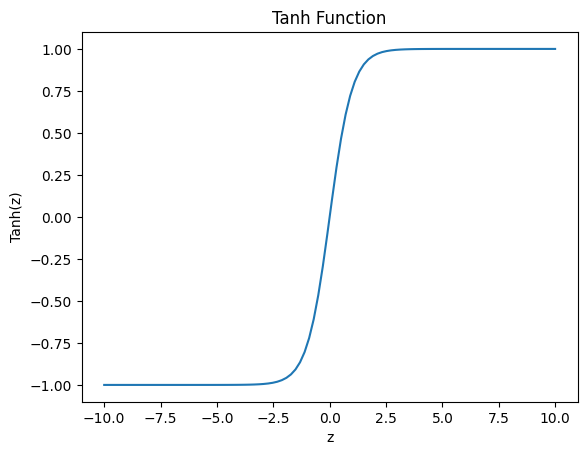

In [ ]:
# TanH function
def tanh(z):
    num = np.exp(z) - np.exp(-z)
    den = np.exp(z) + np.exp(-z)
    return num / den


# Generate a range of values for z
z = np.linspace(-10, 10, 100)
tanh_values = tanh(z)

# Plot the sigmoid function
plt.plot(z, tanh_values)
plt.xlabel("z")
plt.ylabel("Tanh(z)")
plt.title("Tanh Function")
plt.show()

## ReLU

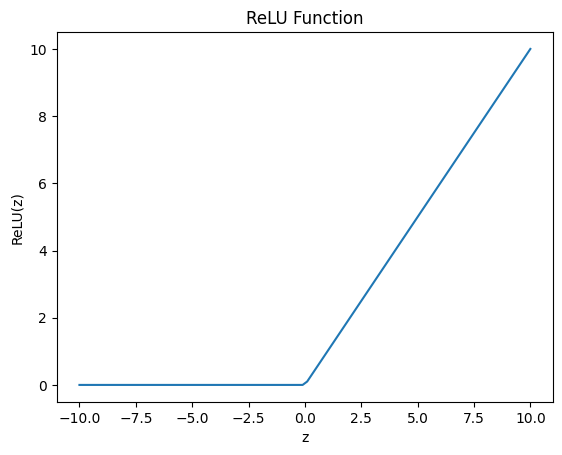

In [ ]:
# ReLU function
def relu(z):
    return np.maximum(0, z)

# Generate a range of values for z
z = np.linspace(-10, 10, 100)           # -10 to +10 spaced with 100 points linearly
relu_values = relu(z)

# Plot the sigmoid function
plt.plot(z, relu_values)
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.title("ReLU Function")
plt.show()

## Logloss for a vector

In [ ]:
import numpy as np

def log_loss(y_true, y_pred):
    epsilon = 1e-15                                     # To avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example 1: Good predictions (Low log loss)
y_true_1 = np.array([1, 0, 1, 1, 0])
y_pred_1 = np.array([0.9, 0.1, 0.8, 0.7, 0.2])

# Example 2: Bad predictions (High log loss)
y_true_2 = np.array([1, 0, 1, 1, 0])
y_pred_2 = np.array([0.1, 0.9, 0.2, 0.3, 0.8])  # Opposite of correct labels

print("Log Loss (Example 1 - Low):", log_loss(y_true_1, y_pred_1))
print("Log Loss (Example 2 - High):", log_loss(y_true_2, y_pred_2))

Log Loss (Example 1 - Low): 0.20273661557656092
Log Loss (Example 2 - High): 1.8056037630364457


In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-Entropy Loss
def compute_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        if epoch % 100 == 0:
            loss = compute_cross_entropy_loss(y, predictions)
            print(f"Epoch {epoch}, Cross-Entropy Loss: {loss:.4f}")
    return weights

# Load California Housing dataset
housing = fetch_california_housing()
X = housing.data  # Features
y = housing.target  # Continuous target (median house value)

# Convert regression target into binary classification (Above/Below median price)
median_price = np.median(y)
y_binary = (y > median_price).astype(int)  # 1 if above median, 0 if below

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Train logistic regression model
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Predictions
z_test = np.dot(X_test, weights)
y_test_pred = (sigmoid(z_test) >= 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 0, Cross-Entropy Loss: 0.6931
Epoch 100, Cross-Entropy Loss: 0.4918
Epoch 200, Cross-Entropy Loss: 0.4612
Epoch 300, Cross-Entropy Loss: 0.4463
Epoch 400, Cross-Entropy Loss: 0.4362
Epoch 500, Cross-Entropy Loss: 0.4286
Epoch 600, Cross-Entropy Loss: 0.4225
Epoch 700, Cross-Entropy Loss: 0.4175
Epoch 800, Cross-Entropy Loss: 0.4134
Epoch 900, Cross-Entropy Loss: 0.4100

Test Accuracy: 0.8098


#LogLoss vs Multi Class Cross Entropy

### LogLoss
- Used for binary classification (2 classes)
- Output is Predicted probabilty for the positive class (class 1)
- Used for applications having binary outcomes like Spam detector, Binary image classification etc.
- Formula: 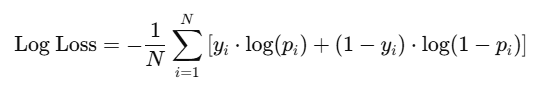

## Cross-Entropy (Multi-Class)
- Used for multi-class classification (more than two classes)
- Output is predicted probabilirt for each class (all summing to 1)
- Used for applications like Digit Classification, Character Classification and Object Detection
- Formula : 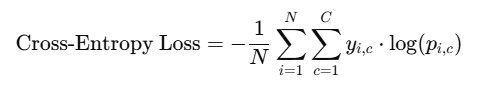